<a href="https://colab.research.google.com/github/VallabhK/SentimentExtraction/blob/master/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Extraction**
This is the program which parses the tweets from Twitter using python and other open source libraries

In [1]:
#Importing all the required libraries
import tweepy #Access twitter API 
from textblob import TextBlob #Process text data
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
url = 'https://raw.githubusercontent.com/VallabhK/SentimentExtraction/master/config.csv?token=AIB6MQO4JLODEEJKJ27WY5TA7HOJW'
config = pd.read_csv(url)

In [3]:
twitterApiKey = config['twitterApiKey'][0]
twitterApiKeySecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

In [4]:
#Create authentication object
authenticate = tweepy.OAuthHandler(twitterApiKey, twitterApiKeySecret)

#Set access token and secret
authenticate.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)

#Create the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [5]:
#Extract tweets
posts= api.user_timeline(screen_name ='BillGates', count =100, lang ='en', tweet_mode ='extended')

print("Show tweets \n")
for tweet in posts[0:5]:
  print(tweet.full_text + '\n')

Show tweets 

During the height of the U.S. polio epidemic, the iron lung was one of the greatest tools used to fight polio. Today, it’s the iron will of the thousands of workers and their supporters who are committed to finishing the job. https://t.co/oAzGsIGSUN #endpolio

RT @UN: Let us renew our determination to build a strong, sustainable and inclusive recovery from the pandemic, and to take decisive action…

Our foundation joined the polio fight almost 15 years ago. And in all that time, I cannot think of a more important moment than right now. https://t.co/ZUyvSZyzau

I look forward to working with you and @EU_Commission on all of these important goals. Europe is a critical partner in creating a net-zero future and ensuring a healthy and equitable world for all. https://t.co/O16waKVVVo

RT @EIB: How can we:
💨 Boost #greentech growth?
🔽 Lower costs?
🪙 Help commercialise #sustainable projects faster?

President Hoyer met with…



In [6]:
#Create a dataframe with all the tweets
df =  pd.DataFrame([tweet.full_text for tweet in posts], columns =['Tweets'])

In [7]:
#Clean the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # r - expression is a raw string
  text = re.sub(r'#','',text) #Remove # symbol
  text = re.sub(r'RT[\s]+','' ,text)
  text = re.sub(r'https?:\/\/\S+','', text)
  return text

In [8]:
#Cleaning the data frame
df['Tweets'] =df['Tweets'].apply(cleanText)
df

,Tweets
0,"During the height of the U.S. polio epidemic, ..."
1,: Let us renew our determination to build a st...
2,Our foundation joined the polio fight almost 1...
3,I look forward to working with you and _Commis...
4,: How can we:\n💨 Boost greentech growth?\n🔽 Lo...
...,...
95,": Bill Gates on Climate Change, Covid and Whet..."
96,"When I talk to people about climate change, I ..."
97,"Thanks for inviting me on the podcast, ."
98,": The Weekly Planet: Lately, Bill Gates has be..."


In [9]:
#Calculate subjectivity- How subjective or opinionated the tweet is
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Calculate polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create new columns in dataframe
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000
1,: Let us renew our determination to build a st...,0.733333,0.433333
2,Our foundation joined the polio fight almost 1...,0.678571,0.395238
3,I look forward to working with you and _Commis...,0.606250,0.225000
4,: How can we:\n💨 Boost greentech growth?\n🔽 Lo...,0.000000,0.000000
...,...,...,...
95,": Bill Gates on Climate Change, Covid and Whet...",0.200000,0.200000
96,"When I talk to people about climate change, I ...",0.125000,0.000000
97,"Thanks for inviting me on the podcast, .",0.200000,0.200000
98,": The Weekly Planet: Lately, Bill Gates has be...",0.570833,-0.295833


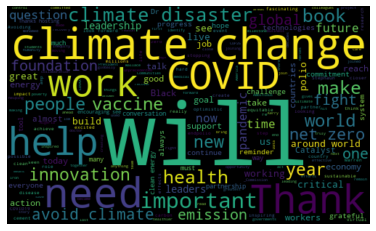

In [10]:
#Let's look at the word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height =300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [11]:
#Compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [12]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,"During the height of the U.S. polio epidemic, ...",1.000000,1.000000,Positive
1,: Let us renew our determination to build a st...,0.733333,0.433333,Positive
2,Our foundation joined the polio fight almost 1...,0.678571,0.395238,Positive
3,I look forward to working with you and _Commis...,0.606250,0.225000,Positive
4,: How can we:\n💨 Boost greentech growth?\n🔽 Lo...,0.000000,0.000000,Neutral
...,...,...,...,...
95,": Bill Gates on Climate Change, Covid and Whet...",0.200000,0.200000,Positive
96,"When I talk to people about climate change, I ...",0.125000,0.000000,Neutral
97,"Thanks for inviting me on the podcast, .",0.200000,0.200000,Positive
98,": The Weekly Planet: Lately, Bill Gates has be...",0.570833,-0.295833,Negative


In [15]:
#Let's check how many of the tweets are positive
count = 1
sortedDataframe = df.sort_values(by=['Polarity'])
for counter in range(0, sortedDataframe.shape[0]):
  if (sortedDataframe['Analysis'][counter] == 'Positive'):
    print(str(count)+ ' ' +sortedDataframe['Tweets'][counter]+'\n')
    count+=1
#this can similarly be done for negative and neutral tweets

1 During the height of the U.S. polio epidemic, the iron lung was one of the greatest tools used to fight polio. Today, it’s the iron will of the thousands of workers and their supporters who are committed to finishing the job.  endpolio

2 : Let us renew our determination to build a strong, sustainable and inclusive recovery from the pandemic, and to take decisive action…

3 Our foundation joined the polio fight almost 15 years ago. And in all that time, I cannot think of a more important moment than right now. 

4 I look forward to working with you and _Commission on all of these important goals. Europe is a critical partner in creating a net-zero future and ensuring a healthy and equitable world for all. 

5 Reaching net-zero emissions by 2050 means transforming our entire physical economy and accelerating innovation at an unprecedented pace.  Energy Catalyst will jumpstart this process. 

6 This is the greatest opportunity for innovation in human history:  

7 : BE Catalyst is fina

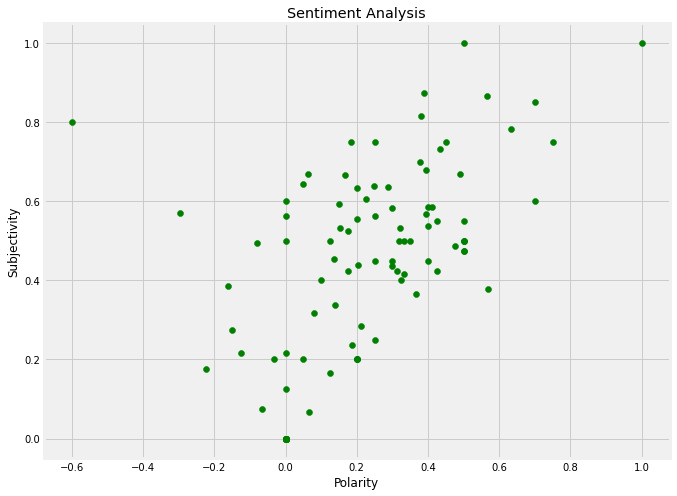

In [17]:
#Let's visualize the polarity and subjectivity
plt.figure(figsize=(10,8))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

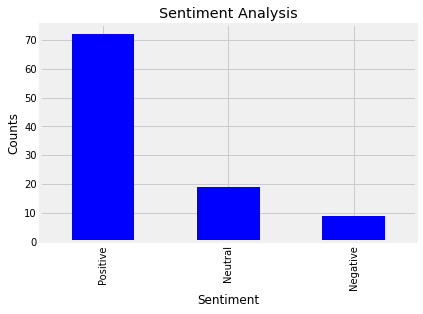

In [24]:
#Lets plot a bar graph for all the tweets
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar', color='Blue')